## DSI Project 2 - Ames Housing Data and Kaggle Challenge

### Part 3: Modeling 

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Scikit imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

### Reading in CSV

In [14]:
train = pd.read_csv('./datasets/train_clean.csv')
train.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,...,0,0,0,0,No Fence,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,...,0,0,0,0,No Fence,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,...,0,0,0,0,No Fence,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,...,0,0,0,0,No Fence,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,...,0,0,0,0,No Fence,0,3,2010,WD,138500


In [15]:
test_kaggle = pd.read_csv('./datasets/test_clean.csv')
test_kaggle.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type
0,0,2658,902301120,190,RM,69.0552,9142,Pave,Reg,Lvl,...,60,112,0,0,0,No Fence,0,4,2006,WD
1,1,2718,905108090,90,RL,43.0000,9662,Pave,IR1,Lvl,...,0,0,0,0,0,No Fence,0,8,2006,WD
2,2,2414,528218130,60,RL,68.0000,17104,Pave,IR1,Lvl,...,24,0,0,0,0,No Fence,0,9,2006,New
3,3,1989,902207150,30,RM,73.0000,8520,Pave,Reg,Lvl,...,0,184,0,0,0,No Fence,0,7,2007,WD
4,4,625,535105100,20,RL,82.0000,9500,Pave,IR1,Lvl,...,76,0,0,185,0,No Fence,0,7,2009,WD


In [16]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [17]:
test_kaggle.columns[test_kaggle.isnull().any()]

Index([], dtype='object')

#### Model 1- All Numeric Features 

__Model Prep: Create features matrix (x) and target vector (y)__

To begin with let's take a look at every numerical column (that is not our target) will be used as a feature.

In [18]:
#creating my x and y variables 
X_1 = train._get_numeric_data().drop(columns='saleprice')
features = list(X_1.columns)
y_1 = train['saleprice']

__Model Prep: Train/Test Split__

Performing a 80-20 train, test split on the X and y variables: 

In [19]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, 
                                                    test_size = 0.2,
                                                    random_state =42,
                                                    shuffle = True)

In [20]:
print(X_1_train.shape, y_1_train.shape)
print(X_1_test.shape, y_1_test.shape)

(1640, 39) (1640,)
(411, 39) (411,)


__Model Fit__

In [21]:
# instantiate LinearRegression estimator
lr = LinearRegression(n_jobs = -1)

# fit Linear model
lr.fit(X_1_train,y_1_train)

LinearRegression(n_jobs=-1)

In [22]:
#Model Predctions given training data
predictions_1 = lr.predict(X_1_test)
print(predictions_1)

[117743.4180105  231220.41217009 265461.17210278 114351.93324742
 203276.03804433 331248.31145428 164015.91136428 269049.87352642
 183396.90473006  97921.386735   136641.0332451  202858.25507346
 172433.92003677 105903.48542713 124376.13835474 106510.23687181
 120036.88641291 212996.87449812 318560.40070557 242280.8394396
 215142.18538586 199817.88584448 141750.87375916 104403.48304925
 159285.37248668 244167.07822117 173938.65392    126311.16235253
 256105.49444715 110048.00855141 306260.15684226 106927.30393331
 124471.98865956 187978.17115686 205480.93289416  78630.38733706
 200809.21720286 235286.08444688 356755.22212243  95106.91447594
 246143.5788609  226775.01768525 302021.23898655 198708.96005399
  56891.62181059 183519.71876721 100745.30643731 125431.10786815
 289684.4296688  128625.01766351 317221.98649844  57013.89552398
 137119.43581656 112604.58972126 150564.31584248 120691.84699543
 262648.24088989 207397.94106048 125972.16999702 172790.70668251
 259722.41485996  49807.97

Text(0, 0.5, 'Actual Price')

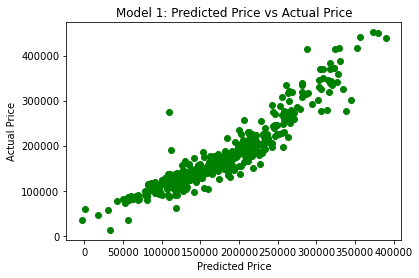

In [23]:
#visualization of model 1 sales price predictions vs actual sale price 
plt.scatter(predictions_1, y_1_test, color ='green')
plt.title('Model 1: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

* __Observation:__ The graph looks somewhat like a straight line( without ignoring a few outliers), meaning the model is a relatively good fit. We can also denote this given the model scores generated below. 

__Scoring of Model__

In [25]:
print(lr.score(X_1_train,y_1_train))
print(lr.score(X_1_test,y_1_test))
print(cross_val_score(lr,X_1,y_1).mean())

0.830799335956232
0.8622809463335834
0.8006598602709767


__Observations:__
* The testing score is slightly higher than the test score meaning this model performs fairly well on new testing data.
* My cross validation score, is a conservative average of all scores, is still fairly high, closer to 1, inidcating a good model fit. 

__Model Evaluation Metrics__

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* R2 Score 

In [26]:
print(mean_absolute_error(y_1_test, predictions_1))
print(mean_squared_error(y_1_test, predictions_1))
print(r2_score(y_1_test, predictions_1))

21060.958559213053
818259891.1594933
0.8622809463335834


In [ ]:
#model.predict(test_kaggle)

__Model Prep: Scaling__

Introducing __Ridge__ and __Lasso__ neutralizers to each of our models in order to see if model scores improve accordingly. 

In [ ]:
ss = StandardScaler()
ss.fit(X_1_train)
X_1_train = ss.transform(X_1_train)
X_1_test = ss.transform(X_1_test)

## Model 2- Beds, Baths, and Basements

Sticking with our theme of beds, baths, and basement, lets look at the related numerical values , with a negtive/positive corelation of 0.5 or greater, expolored in the EDA notebook 

- Total Rooms above ground
- Full baths
- Total basement square footage 

In [28]:
train.totrms_abvgrd
train.full_bath
train.total_bsmt_sf

0        725.0
1        913.0
2       1057.0
3        384.0
4        676.0
         ...  
2046    1884.0
2047     861.0
2048     896.0
2049    1200.0
2050     994.0
Name: total_bsmt_sf, Length: 2051, dtype: float64

In [29]:
#creating my x and y variables 
X_2 = train[['totrms_abvgrd','full_bath','total_bsmt_sf']]
y_2 = train['saleprice']

For the sake of consistecny I'll be incorporating a 80/20 split for all the models explored in this notebook. 

In [30]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, 
                                                    test_size = 0.2,
                                                    random_state =42,
                                                    shuffle = True)

__Model Fit__

In [31]:
# instantiate LinearRegression estimator
lr = LinearRegression(n_jobs = -1)

# fit Lienear model
lr.fit(X_2_train,y_2_train)

LinearRegression(n_jobs=-1)

In [32]:
predictions_2 = lr.predict(X_2_test)
print(predictions_2)

[142628.5910861  206642.27439595 233961.32875187 134197.44681604
 188084.65388014 271031.05417518 129842.30074564 236494.40785229
 196667.28825273 145144.17265217 183659.2370932  222362.20412341
 205981.69525585 114595.97034298 119244.07072288 132448.20481936
  95565.67327626 187763.46743176 283012.5328469  255935.29110115
 171213.26221834 216902.03450089 296592.68618666 145760.15895784
 154432.1930642  234236.99959194 142878.58404405 161819.48137702
 233068.96289716 146090.44852789 221899.55346806 126158.68248478
 161337.70170444 200360.93240914 189128.50983739  93879.44442224
 147937.27060609 196114.31508973 260432.82415241 200691.22197919
 237788.25676748 152523.28061722 261815.15002748 172337.41478768
 100624.3598383  178842.36314134 123437.70079519 113971.80368954
 236923.20027776 148008.46409653 251590.17092631 101900.00251017
 126158.68248478 292515.76521309 134830.71659114 145126.88918274
 254088.46902295 187201.39114708 126158.68248478 192000.98162951
 246781.47732222 107056.2

Text(0, 0.5, 'Actual Price')

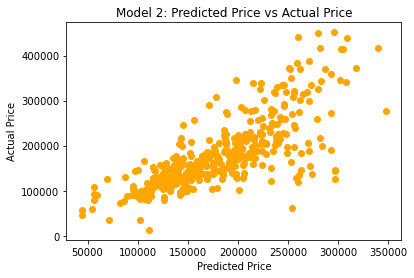

In [34]:
#visualization of model 1 sales price predictions vs actual sale price 
plt.scatter(predictions_2, y_2_test, color ='orange')
plt.title('Model 2: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

* __Observation:__ The graph looks more dispersed and less of a straight line in comparison to model 1, meaning the model isn't as good of a fit as I had hoped. We can also denote this weaker model given the model scores generated below.

### Scoring of Model

In [35]:
print(lr.score(X_2_train,y_2_train))
print(lr.score(X_2_test,y_2_test))
print(cross_val_score(lr,X_2,y_2).mean())

0.5523835792646847
0.5682069589652812
0.5506804243999918


These scores as expected aren't as strong as my scores from model one. 

__Model Evaluation Metrics__ 

In [57]:
print(mean_absolute_error(y_2_test, predictions_2))
print(mean_squared_error(y_2_test, predictions_2))
print(np.sqrt(mean_absolute_error(y_2_test, predictions_2)))
print(r2_score(y_2_test, predictions_2))

35755.14852791486
2565505043.451037
189.09031844046078
0.5682069589652812


In [ ]:
Model 4 - 

### Model 3 - Highly correlated Bed, Bath, and Basements plus.

Let's include the strongest correlated variable to the mix and see what we get.

In [ ]:
#creating my x and y variables 
X_3 = train[['totrms_abvgrd', 'full_bath','total_bsmt_sf','overall_qual']]
y_3 = train['saleprice']

__Model Prep: Train/Test Split__

Performing a 80-20 train, test split on the X and y variables: 

In [ ]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, 
                                                    test_size = 0.2,
                                                    random_state =42,
                                                    shuffle = True)

In [ ]:
print(X_3_train.shape, y_3_train.shape)
print(X_3_test.shape, y_3_test.shape)

__Model Fit__

In [ ]:
# instantiate LinearRegression estimator
lr = LinearRegression(n_jobs = -1)

# fit Lienear model
model_3 = lr.fit(X_3_train,y_3_train)

In [ ]:
#Model Predctions given training data
predictions_3 = model_3.predict(X_3_train)
print(predictions_3)

In [ ]:
#visualization of model 1 sales price predictions vs actual sale price 
plt.scatter(predictions_3, y_3_train, color ='navy')
plt.title('Model 1: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

* __Observation:__ With the addition of the strongest correlated variable the looks to shifting back to a somewhat straight line, meaning the model is a relatively good fit. We can also denote this given the model scores generated below, they increase from around  0.5 to around  0.7. 

__Scoring of Model__

In [ ]:
print(model_3.score(X_3_train,y_3_train))
print(model_3.score(X_3_test,y_3_test))
print(cross_val_score(model_3,X_3,y_3).mean())

In [37]:
train = pd.get_dummies(train, columns=['bsmt_cond'])
train.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,saleprice,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_No Basement,bsmt_cond_Po,bsmt_cond_TA
0,0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,...,3,2010,WD,130500,0,0,0,0,0,1
1,1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,...,4,2009,WD,220000,0,0,0,0,0,1
2,2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,...,1,2010,WD,109000,0,0,0,0,0,1
3,3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,...,4,2010,WD,174000,0,0,0,0,0,1
4,4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,...,3,2010,WD,138500,0,0,1,0,0,0


In [39]:
train.drop('bsmt_cond_Ex', axis = 1, inplace = True)
train.head()

KeyError: "['bsmt_cond_Ex'] not found in axis"

In [46]:
train['total_sf'] = train['1st_flr_sf']+ train['2nd_flr_sf']+train['total_bsmt_sf']
train.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,saleprice,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_No Basement,bsmt_cond_Po,bsmt_cond_TA,total_sf
0,0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,...,3,2010,WD,130500,0,0,0,0,1,2204.0
1,1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,...,4,2009,WD,220000,0,0,0,0,1,3035.0
2,2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,...,1,2010,WD,109000,0,0,0,0,1,2114.0
3,3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,...,4,2010,WD,174000,0,0,0,0,1,1828.0
4,4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,...,3,2010,WD,138500,0,1,0,0,0,2121.0


In [50]:
train.total_sf.describe()

count     2051.000000
mean      2551.804967
std        808.983736
min        334.000000
25%       2005.500000
50%       2456.000000
75%       2994.000000
max      11752.000000
Name: total_sf, dtype: float64

In [53]:
train['big_house'] = (train['total_sf'] > 4000).astype(int)
train.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,...,yr_sold,sale_type,saleprice,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_No Basement,bsmt_cond_Po,bsmt_cond_TA,total_sf,big_house
0,0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,...,2010,WD,130500,0,0,0,0,1,2204.0,0
1,1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,...,2009,WD,220000,0,0,0,0,1,3035.0,0
2,2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,...,2010,WD,109000,0,0,0,0,1,2114.0,0
3,3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,...,2010,WD,174000,0,0,0,0,1,1828.0,0
4,4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,...,2010,WD,138500,0,1,0,0,0,2121.0,0


In [54]:
train.value_counts('big_house')

big_house
0    1957
1      94
dtype: int64